***job 0***

In [ ]:
def factorielle(n):
  if n==0 :
    return 1
  else:
    return n*factorielle(n-1)
  

In [ ]:
n=int(input('entrer un nombre entier : '))
factorielle(n)

entrer un nombre entier : 2


2

***job 0.1***

In [ ]:
def puissance(x,n):
  if n==0:
    return 1
  elif n==1:
    return x
  else:
    return x*puissance(x,n-1)


In [ ]:
n=int(input('entrer un nombre entier : '))
x=float(input('entrer un nombre  : '))
puissance(x,n)

entrer un nombre entier : 2
entrer un nombre  : 2.5


6.25

***Job 03***

In [14]:
def accessible(u,n,P):
    i,j=u
    L={(k,j)for k in range (0,n)}
    if set(P).intersection(L): return False
    M={(i,k)for k in range (0,n)}
    if set(P).intersection(M): return False
    N={(i+k,j-k) for k in range(-i,n-i)}
    if set(P).intersection(N): return False
    O={(i-k,j-k) for k in range(i,i-n,-1)}
    if set(P).intersection(O): return False
    return True

def reines(n):
    i,j,L,P,M=0,0,[],[],[]
    while True:
        while i<n:
            if accessible((i,j),n,P):
                P.append((i,j))
                M.append(frozenset(P))
                i,j=0,j+1
            else: i+=1
        if len(P)==n: L.append(frozenset(P))
        if not P: break
        a,j=P.pop()
        M.append(frozenset(P))
        i=a+1
    return L,M

def convertcase(u):
    return chr(97+u[0])+str(u[1]+1)

def convertpos(P):
    return [convertcase(p) for p in P]

rot = lambda  u,n: (n-1-u[1],u[0])
symv = lambda u,n: (n-1-u[0],u[1])
symd1 = lambda u,n:  (u[1],u[0])
symd2 = lambda u,n: (n-1-u[1],n-1-u[0])
rot2 = lambda u,n: rot(rot(u,n),n)
rot3 = lambda u,n: rot(rot2(u,n),n)
symh = lambda u,n: (u[0],n-1-u[1])

transf={rot,symv,symd1,symd2,rot2,rot3,symh}

import copy
def elimine(V,n):
    L=copy.copy(V)
    M=[]
    while L:
        m=L.pop()
        N={frozenset({f(u,n) for u in m}) for f in transf}  
        if not N.intersection(L):
            M.append(m)
    return M


def convertcaseQ(u):
    return 'Q'+chr(97+u[0])+str(u[1]+1)



def convertposQ(P):
    return {convertcaseQ(p) for p in P}


def reconvertcase(c):
    return (ord(c[0]-97),int(c[1]-1))
    
def creatediag(P,n):
    f=lambda u: u[1]
    P=list(P)
    P.sort(key=f)
    interdit=[(k,l) for k in range(0,n) for l in range(0,n) if (k,l) not in P if not accessible((k,l),n,P)]
    ch="\\begin{frame}\\begin{center}"+ "\chessboard[pgfstyle=cross,shortenstart=0.5ex,shortenend=0.5ex,color=blue, backfields={},setpieces={} ]".format(set(convertpos(interdit)),convertposQ(P))+"\\end{center}\\end{frame}"
    ch=ch.replace("'","")
    return ch



def creatediagSanscroix(P,n):
    f=lambda u: u[1]
    P=list(P)
    P.sort(key=f)
    ch="\\begin{frame}\\begin{center}"+ "\chessboard[pgfstyle=cross,shortenstart=0.5ex,shortenend=0.5ex,color=blue, setpieces={} ]".format(convertposQ(P))+"\\end{center}\\end{frame}"
    ch=ch.replace("'","")
    return ch


def createbeam(n):
    fic=open("reinebeam.tex",'w')
    L,R=reines(n)
    for r in R:
        fic.write(creatediag(r,n))
        fic.write("\n\n")
        if r in L:break
    fic.close()

    fic=open("reinesansrepet.tex",'w')
    N=elimine(L,n)
    for r in N:
        fic.write(creatediagSanscroix(r,n))
        fic.write("\n\n")
    fic.close()

    fic=open("lesSol.tex",'w')
    for ll in L:
        f=lambda u: u[1]
        l=list(ll)
        l.sort(key=f)
        ch=str(convertpos(l))
        ch=ch.replace("'","")
        fic.write(ch)
        fic.write("\n\n")
    fic.close()


    fic=open("lesSolIsom.tex",'w')
    for ll in N:
        f=lambda u: u[1]
        l=list(ll)
        l.sort(key=f)
        ch=str(convertpos(l))
        ch=ch.replace("'","")
        fic.write(ch)
        fic.write("\n\n")
    fic.close()


In [15]:

N=8
createbeam(N)

In [21]:
fic=open("lesSolIsom.tex",'r')

a=fic.read()
print (a)
fic.close()

[c1, f2, b3, e4, h5, a6, g7, d8]

[c1, e2, h3, d4, a5, g6, b7, f8]

[c1, e2, b3, h4, a5, g6, d7, f8]

[b1, g2, e3, h4, a5, d6, f7, c8]

[b1, g2, c3, f4, h5, e6, a7, d8]

[b1, f2, h3, c4, a5, d6, g7, e8]

[b1, f2, a3, g4, d5, h6, c7, e8]

[b1, e2, g3, d4, a5, h6, f7, c8]

[b1, e2, g3, a4, c5, h6, f7, d8]

[b1, d2, f3, h4, c5, a6, g7, e8]

[a1, f2, h3, c4, g5, d6, b7, e8]

[a1, e2, h3, f4, c5, g6, b7, d8]




Job **08**

In [5]:
with open('maze.mz .txt', 'r') as maze_io :
    maze = []
    for row in maze_io :
        maze.append(list(row.strip()))

w = len(maze[0])
h = len(maze)

In [6]:
directions = ((0,1),(0,-1),(1,0),(-1,0))
links = []
for i in range(h):
    for j in range(w):
        if maze[i][j] == '.' :
            for direction in directions :
                di,dj = direction
                if i+di in range(h) and j+dj in range(w) and maze[i+di][j+dj] == '.' and {(i,j),(i+di,j+dj)} not in links :
                    links.append( {(i,j),(i+di,j+dj)} )

In [7]:
borders = []
border = {(0,0)}
visited = set()
while (h-1,w-1) not in border :
    borders.append(border)
    visited |= border
    border = set()
    for node in borders[-1] :
        for link in links :
            if node in link :
                next_node = link - {node}
                if not (next_node & visited) :
                    border |= next_node

In [ ]:
current = h-1, w-1
path = [current]
for border in borders[::-1] :
    for node in border :
        if {node, current} in links :
            path.append(node)
            current = node
            break
path = path[::-1]

solved_maze = [row[:] for row in maze]
for i,j in path :
    solved_maze[i][j] = 'X'

for row in solved_maze :
    print(''.join(row))

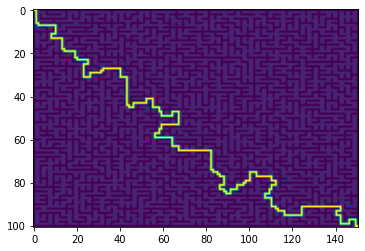

In [12]:
import matplotlib.pyplot as plt
conversion = {'.':2, '#':0, 'X':20}
num_solved_maze = [[conversion[solved_maze[i][j]] for j in range(w)] for i in range(h)]
plt.imshow(num_solved_maze);